In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# load dataset

In [ ]:
import pandas as pd
data=pd.read_csv('passwords.csv', on_bad_lines='skip')
data.head()
data.shape


(100000, 2)

In [ ]:
data

,password,strength
0,yrtzuab476,1
1,yEdnN9jc1NgzkkBP,2
2,sarita99,1
3,Suramerica2015,2
4,PPRbMvDIxMQ19TMo,2
...,...,...
99995,aulona044,1
99996,5201314ding,1
99997,isaac19725,1
99998,toji25,0


# 0 for weak 1 for medium strength and 2 for strength

In [ ]:
data['strength'].unique()


array([1, 2, 0])

In [ ]:
data[data['password'].isnull()]

,password,strength


# steps to compute tf-idf frequency values

In [ ]:
import numpy as np
password_tuple=np.array(data)
password_tuple

array([['yrtzuab476', 1],
       ['yEdnN9jc1NgzkkBP', 2],
       ['sarita99', 1],
       ...,
       ['isaac19725', 1],
       ['toji25', 0],
       ['midnight000', 1]], dtype=object)

In [ ]:
data.isnull().sum()

,0
password,0
strength,0


In [ ]:
data["strength"].value_counts()

,count
strength,
1,74278
0,13428
2,12294


<Axes: xlabel='strength', ylabel='count'>

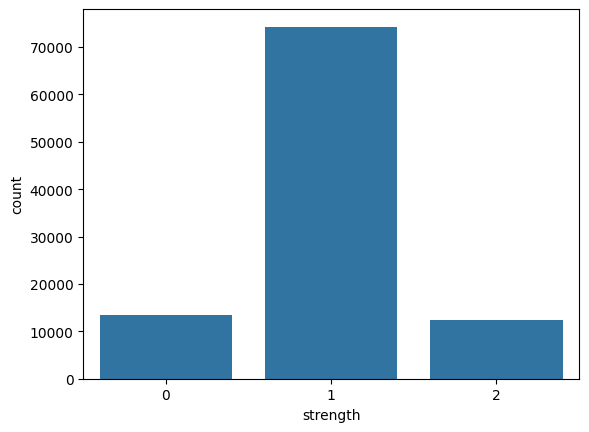

In [ ]:
sns.countplot(x = 'strength', data = data)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = data.dropna(subset=['password'])

def word_divide_char(inputs):
    character=[]
    for i in inputs:
        character.append(i)
    return character

x=[labels[0] for labels in password_tuple]
y=[labels[1] for labels in password_tuple]


vectorizer=TfidfVectorizer(tokenizer=word_divide_char)  #Converts a collection of raw documents to a matrix of TF-IDF features.
X=vectorizer.fit_transform(x)
X.shape
vectorizer.get_feature_names_out()


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['\x1c', ' ', '!', '"', '#', '$', '%', '&', '(', ')', '*', '+', '-',
       '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';',
       '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}',
       '~', '\x81', '\x8d', '«', '±', '³', '´', '·', '»', 'á', 'ä', 'ï',
       'ñ', 'ô', 'ú', 'ý', 'þ', 'ƒ', '‡'], dtype=object)

In [ ]:
first_document_vector=X[0]
first_document_vector
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.31354333],
        [0.        ],
        [0.33212464],
        [0.33125192],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.21189956],
        [0.35353075],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [ ]:
df=pd.DataFrame(first_document_vector.T.todense(),index=vectorizer.get_feature_names_out(),columns=['TF-IDF'])
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
z,0.377586
b,0.353531
6,0.332125
7,0.331252
y,0.328337
...,...
>,0.000000
=,0.000000
<,0.000000
;,0.000000


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
X_train.shape

(80000, 84)

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")
lr=LogisticRegression(random_state=0,multi_class='multinomial')
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  755  1957     3]
 [  490 13989   310]
 [    8   856  1632]]
0.8188
              precision    recall  f1-score   support

           0       0.60      0.28      0.38      2715
           1       0.83      0.95      0.89     14789
           2       0.84      0.65      0.73      2496

    accuracy                           0.82     20000
   macro avg       0.76      0.63      0.67     20000
weighted avg       0.80      0.82      0.80     20000



#  RandomForestClassifier

              precision    recall  f1-score   support

           0       0.90      0.73      0.80      2716
           1       0.93      0.98      0.95     14856
           2       0.95      0.85      0.90      2428

    accuracy                           0.93     20000
   macro avg       0.93      0.85      0.89     20000
weighted avg       0.93      0.93      0.93     20000



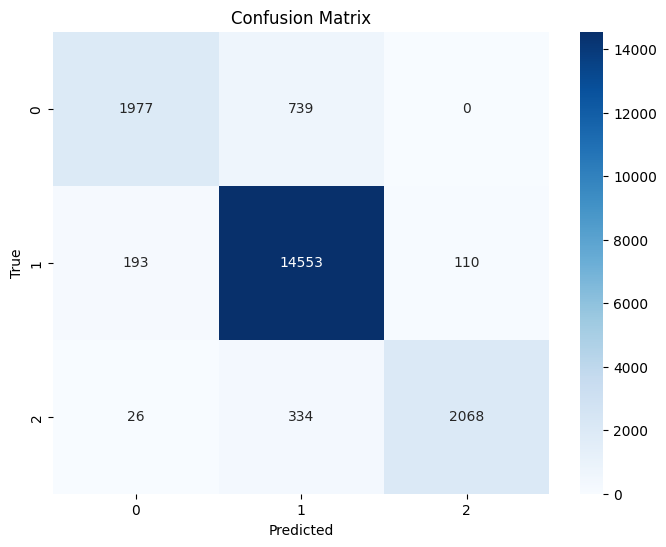

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
rfc=RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
# print(cm)
print(classification_report(y_test,y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

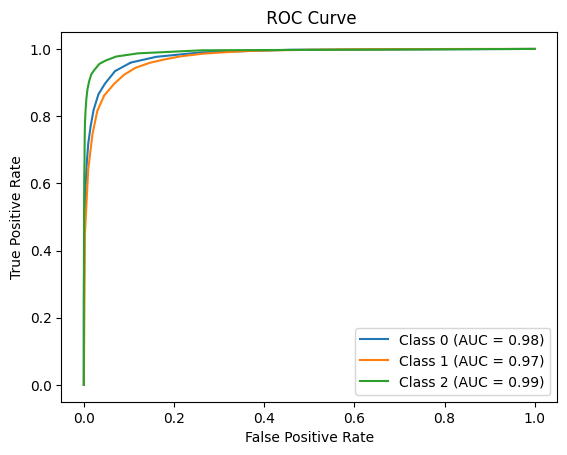

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust class labels if needed
y_pred_prob = rfc.predict_proba(X_test) #predict_proba(X_test) returns an array of shape (n_samples, n_classes) where each row contains the probability estimates for each class.


fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


import matplotlib.pyplot as plt
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend()
plt.show()


In [ ]:


def predict_password_strength(password, model=rfc, vectorizer=vectorizer):
  password_vector = vectorizer.transform([password])
  strength = model.predict(password_vector)[0]
  return strength


new_password = "P@$$wOrd123"
predicted_strength = predict_password_strength(new_password)

print(f"The predicted strength of '{new_password}' is: {predicted_strength}")



The predicted strength of 'P@$$wOrd123' is: 2


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)


acc=accuracy_score(ypred,y_test)
print
print(f"accuracy using KNN Model {acc * 100:.2f}%")

cm=confusion_matrix(ypred,y_test)
cr=classification_report(ypred,y_test)

print(cm)
print(cr)

accuracy using KNN Model 73.75%
[[  769  1600   202]
 [ 1895 12722  1036]
 [   51   467  1258]]
              precision    recall  f1-score   support

           0       0.28      0.30      0.29      2571
           1       0.86      0.81      0.84     15653
           2       0.50      0.71      0.59      1776

    accuracy                           0.74     20000
   macro avg       0.55      0.61      0.57     20000
weighted avg       0.75      0.74      0.74     20000



NameError: name 'ypred' is not defined

# Support vector Classification

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
cm=confusion_matrix(ypred,y_test)
cr=classification_report(ypred,y_test)

print(cm)
print(cr)


SVM Accuracy: 0.8098
[[  769  1600   202]
 [ 1895 12722  1036]
 [   51   467  1258]]
              precision    recall  f1-score   support

           0       0.28      0.30      0.29      2571
           1       0.86      0.81      0.84     15653
           2       0.50      0.71      0.59      1776

    accuracy                           0.74     20000
   macro avg       0.55      0.61      0.57     20000
weighted avg       0.75      0.74      0.74     20000



#  DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

NameError: name 'X_train' is not defined

# BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.9208

# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.81075

# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)


0.78925

# xgboost

In [ ]:
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8482

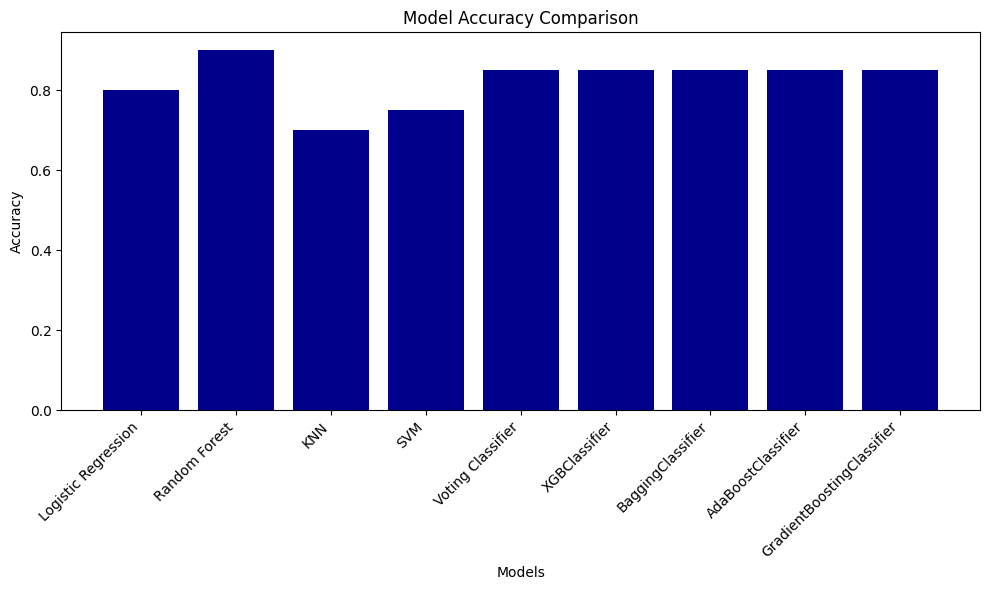

In [ ]:



accuracy_scores = {
    'Logistic Regression': 0.8,
    'Random Forest': 0.9,
    'KNN': 0.7,
    'SVM': 0.75,
    'Voting Classifier': 0.85,
    'XGBClassifier':0.85,
    'BaggingClassifier':0.85,
    'AdaBoostClassifier':0.85,
    'GradientBoostingClassifier':0.85,
    # Example accuracy
    # Add other models here...
}

models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='darkblue')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

RF has the highest accuracy: prediction with RF

In [ ]:
# xpredict=['aAKLkl5466!@#$']
# xpredict=vectorizer.transform(xpredict)
# y_pred=rfc.predict(xpredict)
# if y_pred == 1:
#     print("Medium strength")
# elif y_pred == 2:
#     print("Strong strength")
# else:
#     print("Weak strength")

Medium strength
